In [119]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore")
sns.set_theme(style='darkgrid', palette='autumn')

In [2]:
df_customer = pd.read_csv('Customer_clean.csv')
df_product = pd.read_csv('Product_clean.csv')
df_store = pd.read_csv('Store_clean.csv')
df_transaction = pd.read_csv('Transaction_clean.csv')

# EDA

## 1. Data Transaction

In [3]:
df_transaction.head()

,transactionid,customerid,Date,productid,price,qty,totalamount,storeid
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [4]:
print("Total Null : \n",df_transaction.isna().sum())
print("Total Data : ",df_transaction.shape)
print("Total Duplicated : ",df_transaction.duplicated().sum())
print(df_transaction.info())

Total Null : 
 transactionid    0
customerid       0
Date             0
productid        0
price            0
qty              0
totalamount      0
storeid          0
dtype: int64
Total Data :  (5020, 8)
Total Duplicated :  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionid  5020 non-null   object
 1   customerid     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   productid      5020 non-null   object
 4   price          5020 non-null   int64 
 5   qty            5020 non-null   int64 
 6   totalamount    5020 non-null   int64 
 7   storeid        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB
None


### Handle Duplicated Data

In [5]:
# Check duplicated by transactionid
df_transaction.duplicated(subset='transactionid').sum()

112

In [6]:
df_transaction = df_transaction.drop_duplicates(subset='transactionid',keep='last')
print("Total Data : ",df_transaction.shape)

Total Data :  (4908, 8)


### Fix unmatched data types

("Date" : Object) to (timestamp)

In [7]:
df_transaction['Date'].dtype

dtype('O')

In [8]:
df_transaction['Date'] = pd.to_datetime(df_transaction['Date'])

## 2. Data Customer

In [9]:
df_customer.head()

,customerid,age,gender,Marital Status,income
0,1,55,1,Married,5.12
1,2,60,1,Married,6.23
2,3,32,1,Married,9.17
3,4,31,1,Married,4.87
4,5,58,1,Married,3.57


In [10]:
print("Total Null : \n",df_customer.isna().sum())
print("Total Data : ",df_customer.shape)
print("Total Duplicated : ",df_customer.duplicated().sum())
df_customer.info()

Total Null : 
 customerid        0
age               0
gender            0
Marital Status    0
income            0
dtype: int64
Total Data :  (444, 5)
Total Duplicated :  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customerid      444 non-null    int64  
 1   age             444 non-null    int64  
 2   gender          444 non-null    int64  
 3   Marital Status  444 non-null    object 
 4   income          444 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 17.5+ KB


## 3. Data Product

In [11]:
df_product.head()

,productid,Product Name,price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [12]:
print("Total Null : \n",df_customer.isna().sum())
print("Total Data : ",df_product.shape)
print("Total Duplicated : ",df_product.duplicated().sum())
df_product.info()

Total Null : 
 customerid        0
age               0
gender            0
Marital Status    0
income            0
dtype: int64
Total Data :  (10, 3)
Total Duplicated :  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   productid     10 non-null     object
 1   Product Name  10 non-null     object
 2   price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


## 4. Data Store

In [13]:
df_store.head()

,storeid,storename,groupstore,Type,latitude,longitude
0,1,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666
1,2,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238
2,3,Prima Kota,Prima,Modern Trade,-7.797068,110.370529
3,4,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,5,Bonafid,Gita,General Trade,-7.250445,112.768845


In [14]:
print("Total Null : \n",df_store.isna().sum())
print("Total Data (Row,Col) : ",df_store.shape)
print("Total Duplicated : ",df_store.duplicated().sum())
df_store.info()

Total Null : 
 storeid       0
storename     0
groupstore    0
Type          0
latitude      0
longitude     0
dtype: int64
Total Data (Row,Col) :  (14, 6)
Total Duplicated :  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   storeid     14 non-null     int64  
 1   storename   14 non-null     object 
 2   groupstore  14 non-null     object 
 3   Type        14 non-null     object 
 4   latitude    14 non-null     float64
 5   longitude   14 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 800.0+ bytes


# Merge Data

In [15]:
df = df_transaction.copy()
df = df.merge(df_customer,how='left', on='customerid')
df = df.merge(df_product, how='left', on='productid')
df = df.merge(df_store, how='left', on='storeid')

# Delete duplicate column
df = df.drop(['price_y'], axis=1)

In [16]:
df.head()

,transactionid,customerid,Date,productid,price_x,qty,totalamount,storeid,age,gender,Marital Status,income,Product Name,storename,groupstore,Type,latitude,longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36.0,0.0,Married,10.53,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR16356,165,2022-01-01,P9,10000,7,70000,1,44.0,1.0,Married,14.58,Yoghurt,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666
2,TR1984,183,2022-01-01,P1,8800,4,35200,4,27.0,1.0,Single,0.18,Choco Bar,Gita Ginara,Gita,General Trade,-6.966667,110.416664
3,TR35256,160,2022-01-01,P1,8800,7,61600,4,48.0,1.0,Married,12.57,Choco Bar,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,TR41231,386,2022-01-01,P9,10000,1,10000,4,33.0,0.0,Married,6.95,Yoghurt,Gita Ginara,Gita,General Trade,-6.966667,110.416664


In [17]:
df.isna().sum()

transactionid      0
customerid         0
Date               0
productid          0
price_x            0
qty                0
totalamount        0
storeid            0
age               44
gender            44
Marital Status    44
income            44
Product Name       0
storename          0
groupstore         0
Type               0
latitude           0
longitude          0
dtype: int64

# Preprocessing

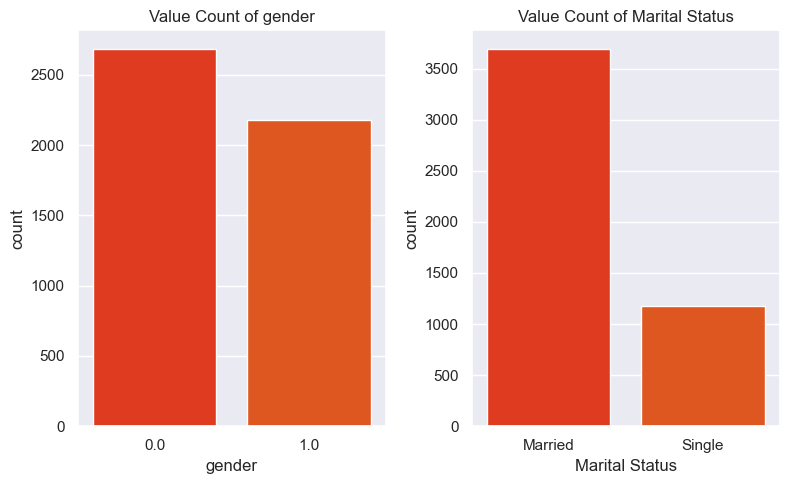

In [18]:
# Remove Missing Value
plt.figure(figsize=(12,5))
null_col = ['gender','Marital Status']
for i in range(len(null_col)):
    plt.subplot(1,3, i+1)
    sns.countplot(data=df, x=null_col[i])
    plt.title(f"Value Count of {null_col[i]}")
plt.tight_layout()

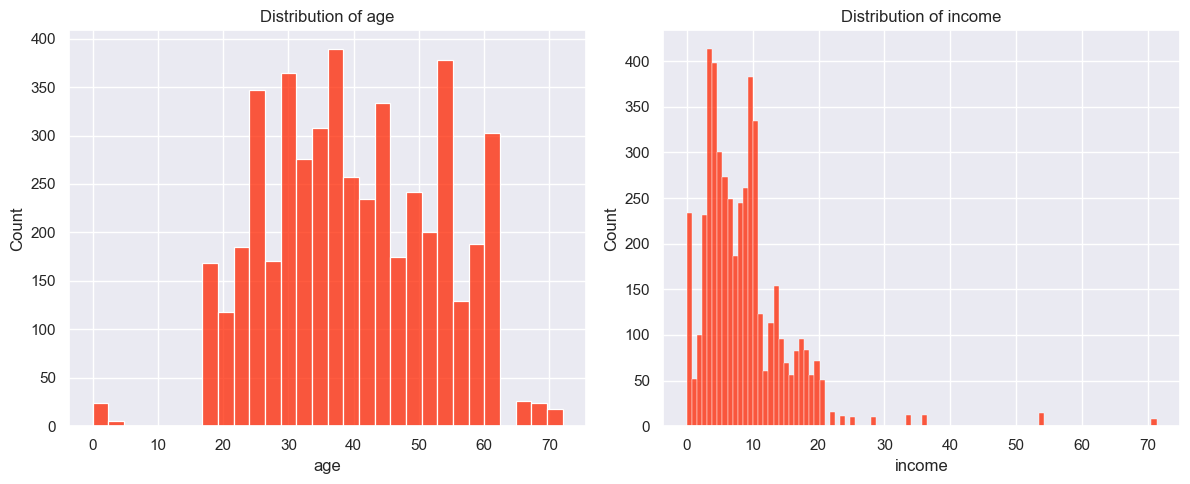

In [19]:
plt.figure(figsize=(18,5))
null_col = ['age','income']
for i in range(len(null_col)):
    plt.subplot(1,3, i+1)
    sns.histplot(data=df, x=null_col[i])
    plt.title(f"Distribution of {null_col[i]}")
plt.tight_layout()

In [20]:
df.fillna({'gender' : df['gender'].mode()[0], 'Marital Status':df['Marital Status'].mode()[0]}, inplace=True)

In [21]:
df.fillna({'age' : int(df['age'].mean()), 'income':df['income'].median()}, inplace=True)

In [22]:
df.isna().sum()

transactionid     0
customerid        0
Date              0
productid         0
price_x           0
qty               0
totalamount       0
storeid           0
age               0
gender            0
Marital Status    0
income            0
Product Name      0
storename         0
groupstore        0
Type              0
latitude          0
longitude         0
dtype: int64

# FORECASTING ARIMA

## Feature Selection for Modeling 1 (ARIMA)

In [103]:
df_forecasting = df.groupby(by='Date')[['qty']].sum()
df_forecasting.head()

,qty
Date,
2022-01-01,47
2022-01-02,45
2022-01-03,67
2022-01-04,98
2022-01-05,57


In [104]:
train = df_forecasting.loc[:'2022-11-30'] 
test = df_forecasting.loc['2022-12-01':] # Forecast last 30 days 

## Check Stasionarity
Jika di investigasi melalui line plot, maka data adalah `STASIONER`, Karena :
- Data tidak memiliki trend 
- Tidak terdapat pola seasonality (naik / turun dalam periode tertentu)

<AxesSubplot:xlabel='Date', ylabel='qty'>

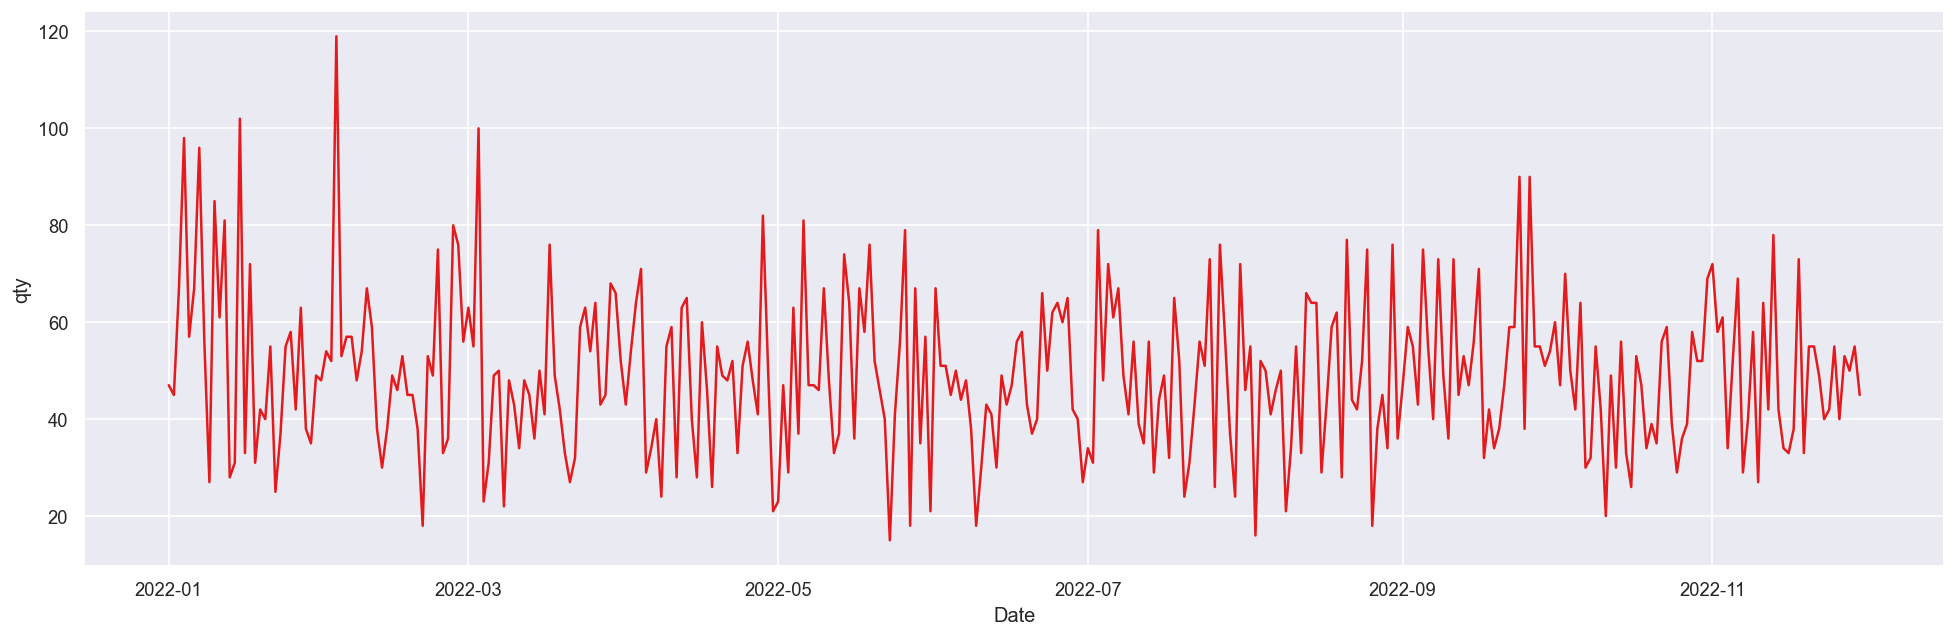

In [105]:
plt.figure(figsize=(20,6))
sns.lineplot(data=train, x=train.index, y= 'qty')

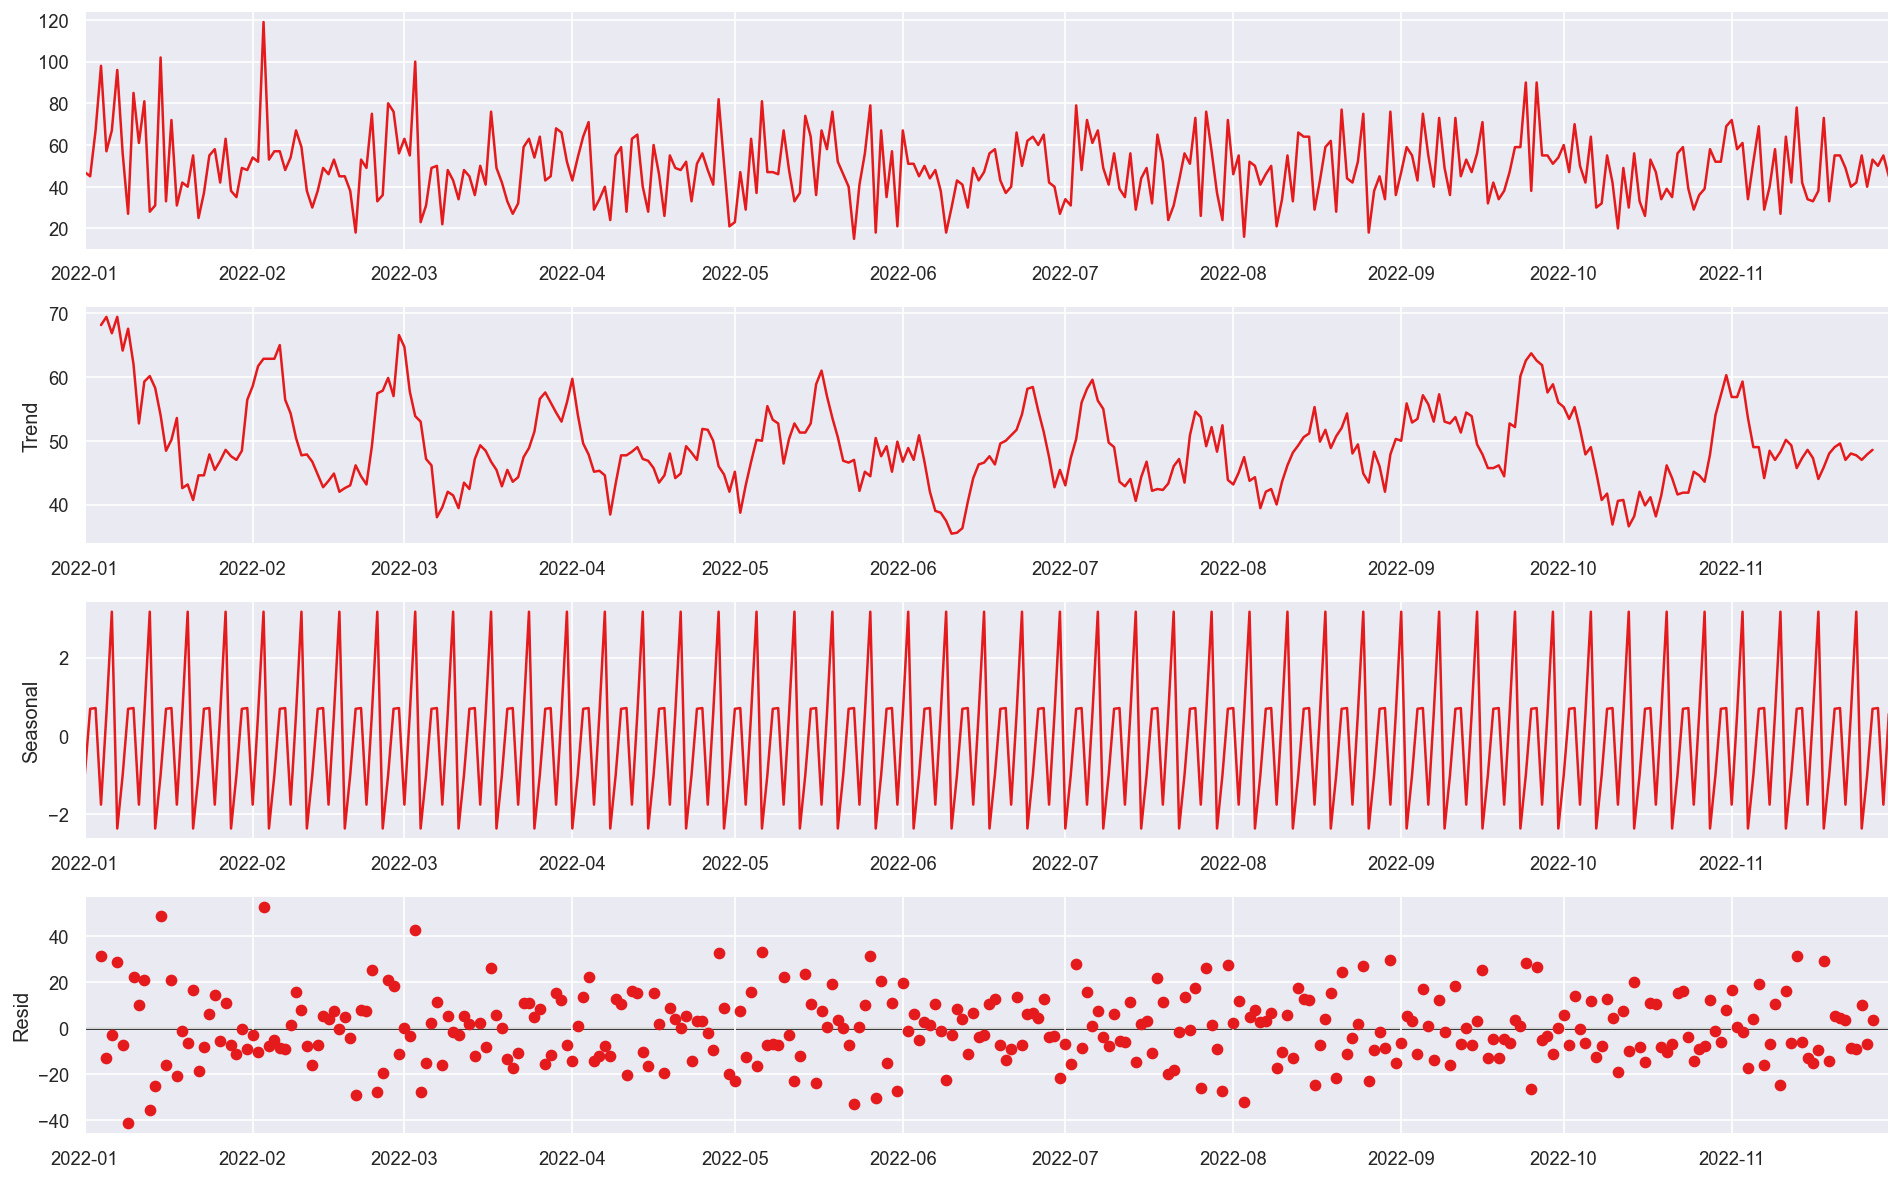

In [106]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 16, 10
decomposition = sm.tsa.seasonal_decompose(train, model='additive')
fig = decomposition.plot()
plt.show()

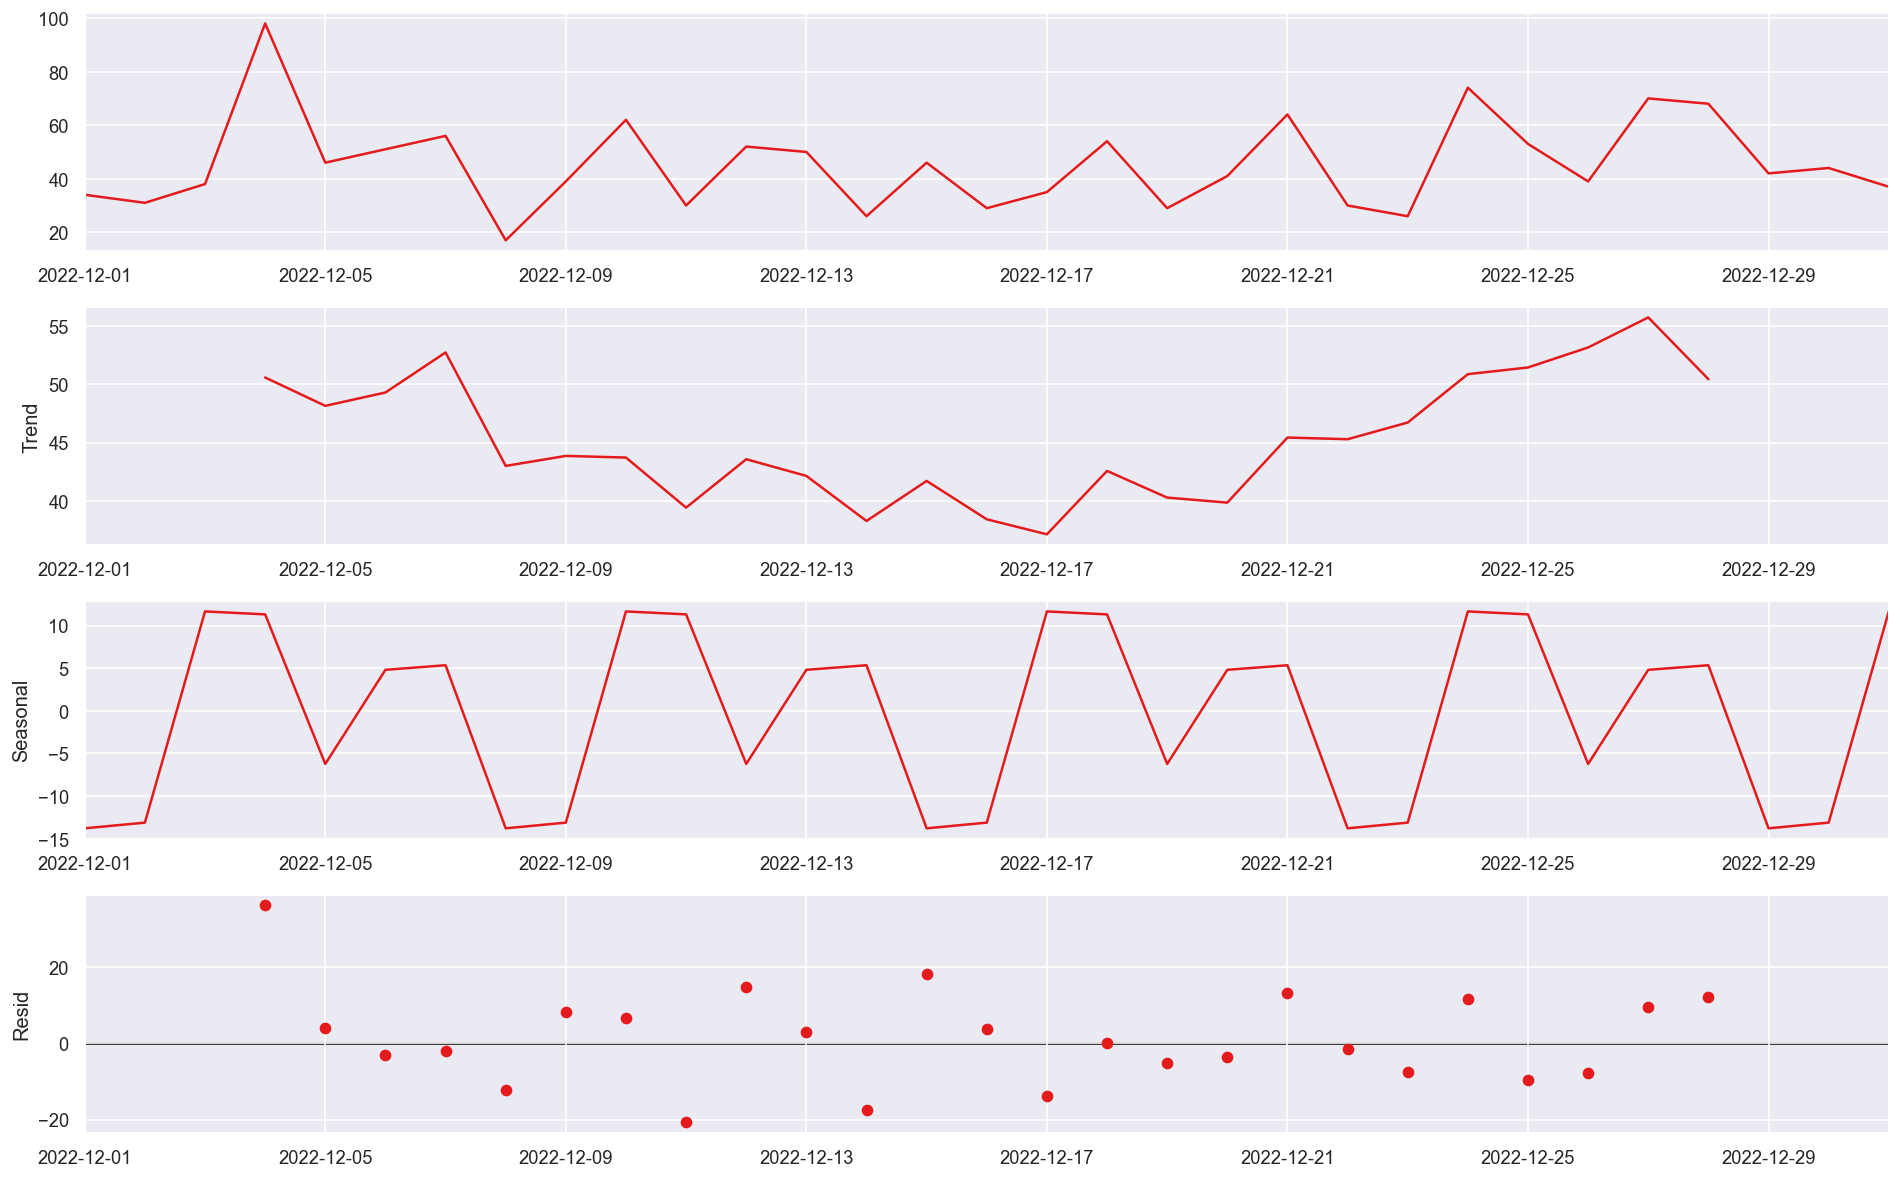

In [107]:
# Check data test
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 16, 10
decomposition = sm.tsa.seasonal_decompose(test, model='additive')
fig = decomposition.plot()
plt.show()

Terdapat Seasonal denggan periode 7 (Mingguan)

### Augmented Dickey-Fuller Test (ADF)
- Hipotesis nol (Ho) dari uji ADF adalah bahwa deret waktu `Tidak Stasioner`. 
- Hipotesis alternatif (H1) dari uji ADF adalah bahwa deret waktu `Stasioner`.  
- Jadi, jika nilai P-value dari ADF kurang dari tresholsd critical value (0,05). maka kita menolak hipotesis nol dan menyimpulkan bahwa deret waktu tersebut memang stasioner.

Sehingga berdasarkan uji ADF (p-value < 0.05). Maka tolak H0, sehingga data tersebut adalah Stasioner

In [108]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(train['qty'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -18.480286
p-value: 0.000000
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


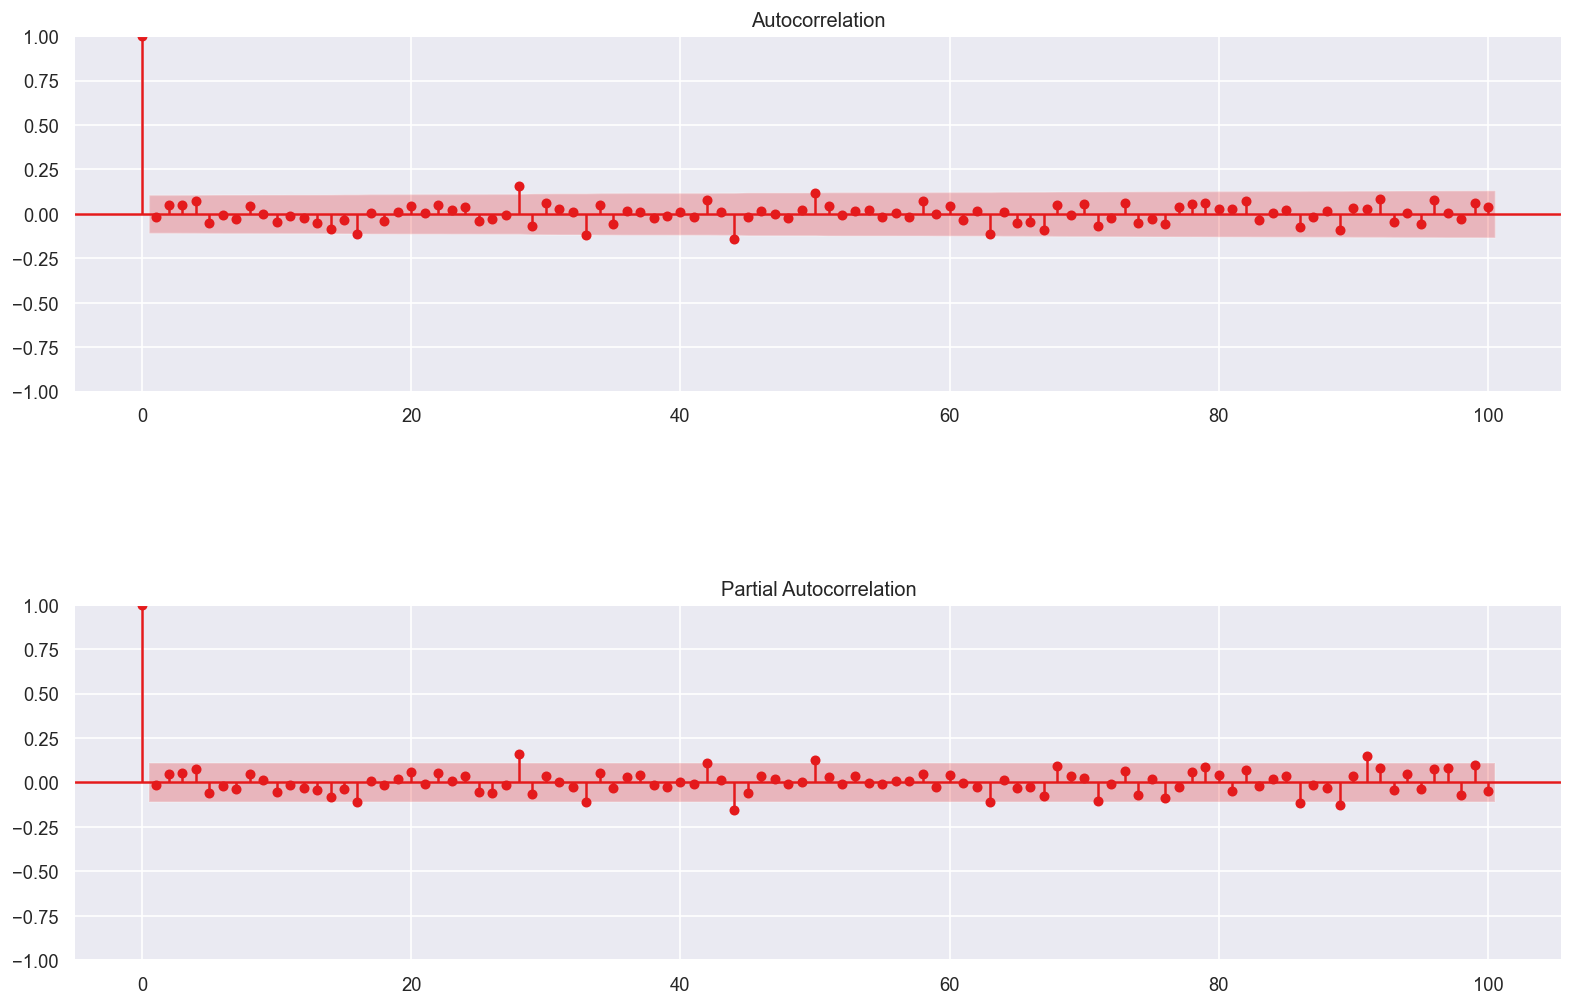

In [109]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig = plt.figure()
fig.subplots_adjust(hspace=0.6)
plt.subplot(2,1,1)
plot_acf(train, ax=plt.gca(), lags=100) # gca -> "GetCurrentAxis"

# Plots lags on the horizontal and the correlations on vertical axis.
plt.subplot(2,1,2)
plot_pacf(train, ax=plt.gca(), lags=100)
plt.show()

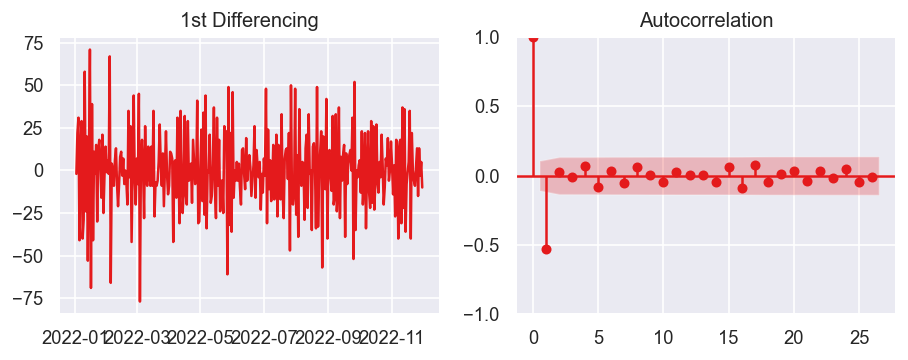

In [110]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2)
axes[0].plot(train.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(train.diff().dropna(), ax=axes[1])

plt.show()

## Arima Modeling (Manual)

In [115]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['qty'], order=(0,1,30))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\jodhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jodhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jodhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jodhi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                    qty   No. Observations:                  334
Model:                ARIMA(0, 1, 30)   Log Likelihood               -1390.827
Date:                Sun, 03 Sep 2023   AIC                           2843.653
Time:                        15:30:36   BIC                           2961.706
Sample:                    01-01-2022   HQIC                          2890.727
                         - 11-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0132      0.062    -16.407      0.000      -1.134      -0.892
ma.L2          0.0829      0.080      1.030      0.303      -0.075       0.241
ma.L3          0.0100      0.087      0.115      0.9

In [117]:
y_pred = model_fit.get_forecast(len(test))
y_pred_df = y_pred.conf_int()
y_pred_df['predict'] = model_fit.predict(start=y_pred_df.index[0], end=y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_df

,lower qty,upper qty,predict
Date,,,
2022-12-01,13.952976,74.882868,44.417922
2022-12-02,8.204539,69.139037,38.671788
2022-12-03,23.687898,84.768585,54.228242
2022-12-04,21.674710,82.944622,52.309666
2022-12-05,16.324448,77.769995,47.047221
2022-12-06,13.376590,74.826376,44.101483
2022-12-07,18.675791,80.133340,49.404566
2022-12-08,15.046149,76.570055,45.808102
2022-12-09,17.784156,79.384653,48.584404


<AxesSubplot:xlabel='Date', ylabel='predict'>

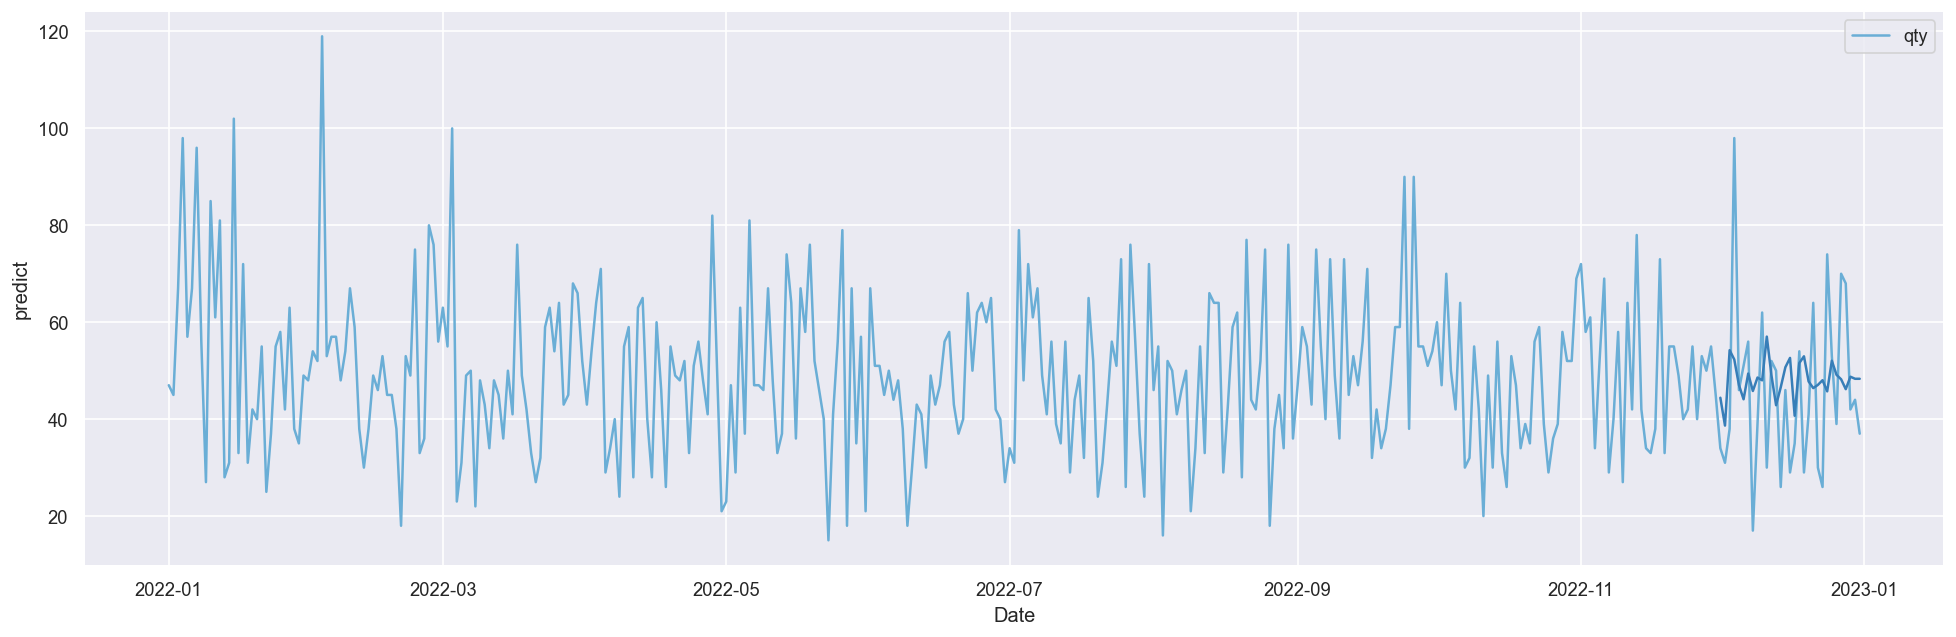

In [118]:
plt.figure(figsize = (20,6))
sns.lineplot(data=df_forecasting, palette='Blues')
sns.lineplot(data=y_pred_df['predict'], palette='Red')

In [121]:
mean_squared_error(y_pred_df['predict'],test)

300.3949319176144

## Auto Modeling Arima

In [34]:
from pmdarima import auto_arima

In [35]:
arima_model = auto_arima(train, start_p=0, start_q=0,max_p=40, max_q=40, 
                                start_P=0, start_Q=0, max_P=5,max_Q=5,
                                seasonal=True,m=7,
                                d=0, D=1, trace=True,
                                error_action='ignore',  
                                suppress_warnings=True, 
                                stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=2989.350, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=2912.464, Time=0.16 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=2987.457, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=2990.541, Time=0.06 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=2862.231, Time=0.64 sec
 ARIMA(1,0,0)(3,1,0)[7] intercept   : AIC=2811.913, Time=1.11 sec
 ARIMA(1,0,0)(4,1,0)[7] intercept   : AIC=2809.312, Time=1.37 sec
 ARIMA(1,0,0)(5,1,0)[7] intercept   : AIC=2791.874, Time=2.38 sec
 ARIMA(1,0,0)(5,1,1)[7] intercept   : AIC=2782.118, Time=3.43 sec
 ARIMA(1,0,0)(4,1,1)[7] intercept   : AIC=2782.057, Time=3.29 sec
 ARIMA(1,0,0)(3,1,1)[7] intercept   : AIC=2783.772, Time=1.45 sec
 ARIMA(1,0,0)(4,1,2)[7] intercept   : AIC=2780.145, Time=2.83 sec
 ARIMA(1,0,0)(3,1,2)[7] intercept   : AIC=2779.256, Time=2.96 sec
 ARIMA(1,0,0)(2,1,2)[7] intercept   : 

C:\Users\jodhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jodhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Date', ylabel='predicted_mean'>

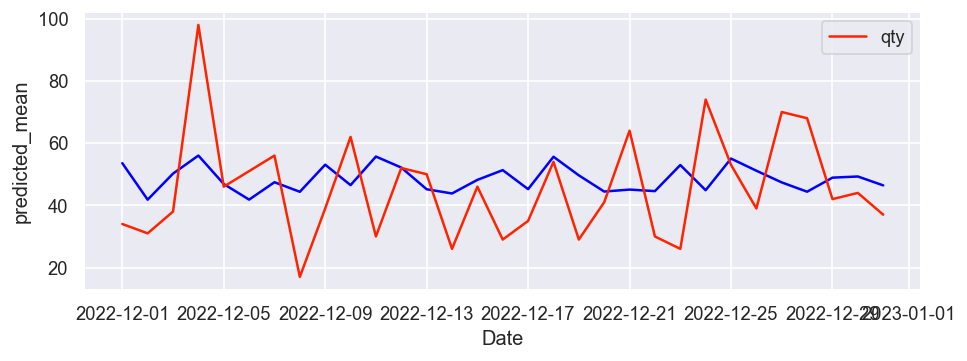

In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
best_order = (0, 0, 0)
best_seasonal_order = (3,1,2,7)
model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)
sarimax_model = model.fit()

# Tentukan rentang tanggal untuk peramalan
start_date = '2022-01-01'
end_date = '2023-10-19'

# Lakukan peramalan untuk rentang tanggal tertentu
forecast = sarimax_model.predict(start=test.index[0],end=test.index[-1])
sns.lineplot(data=forecast, color = 'Blue')
sns.lineplot(data=test, color = 'Red')

In [102]:
from sklearn.metrics import mean_squared_error
sarimax_eval = mean_squared_error(forecast, test)
print("Sarimax Eval (RMSE)): ",sarimax_eval)

Sarimax Eval (RMSE)):  301.1996750272022


# MOVING AVERAGE FORECASTING

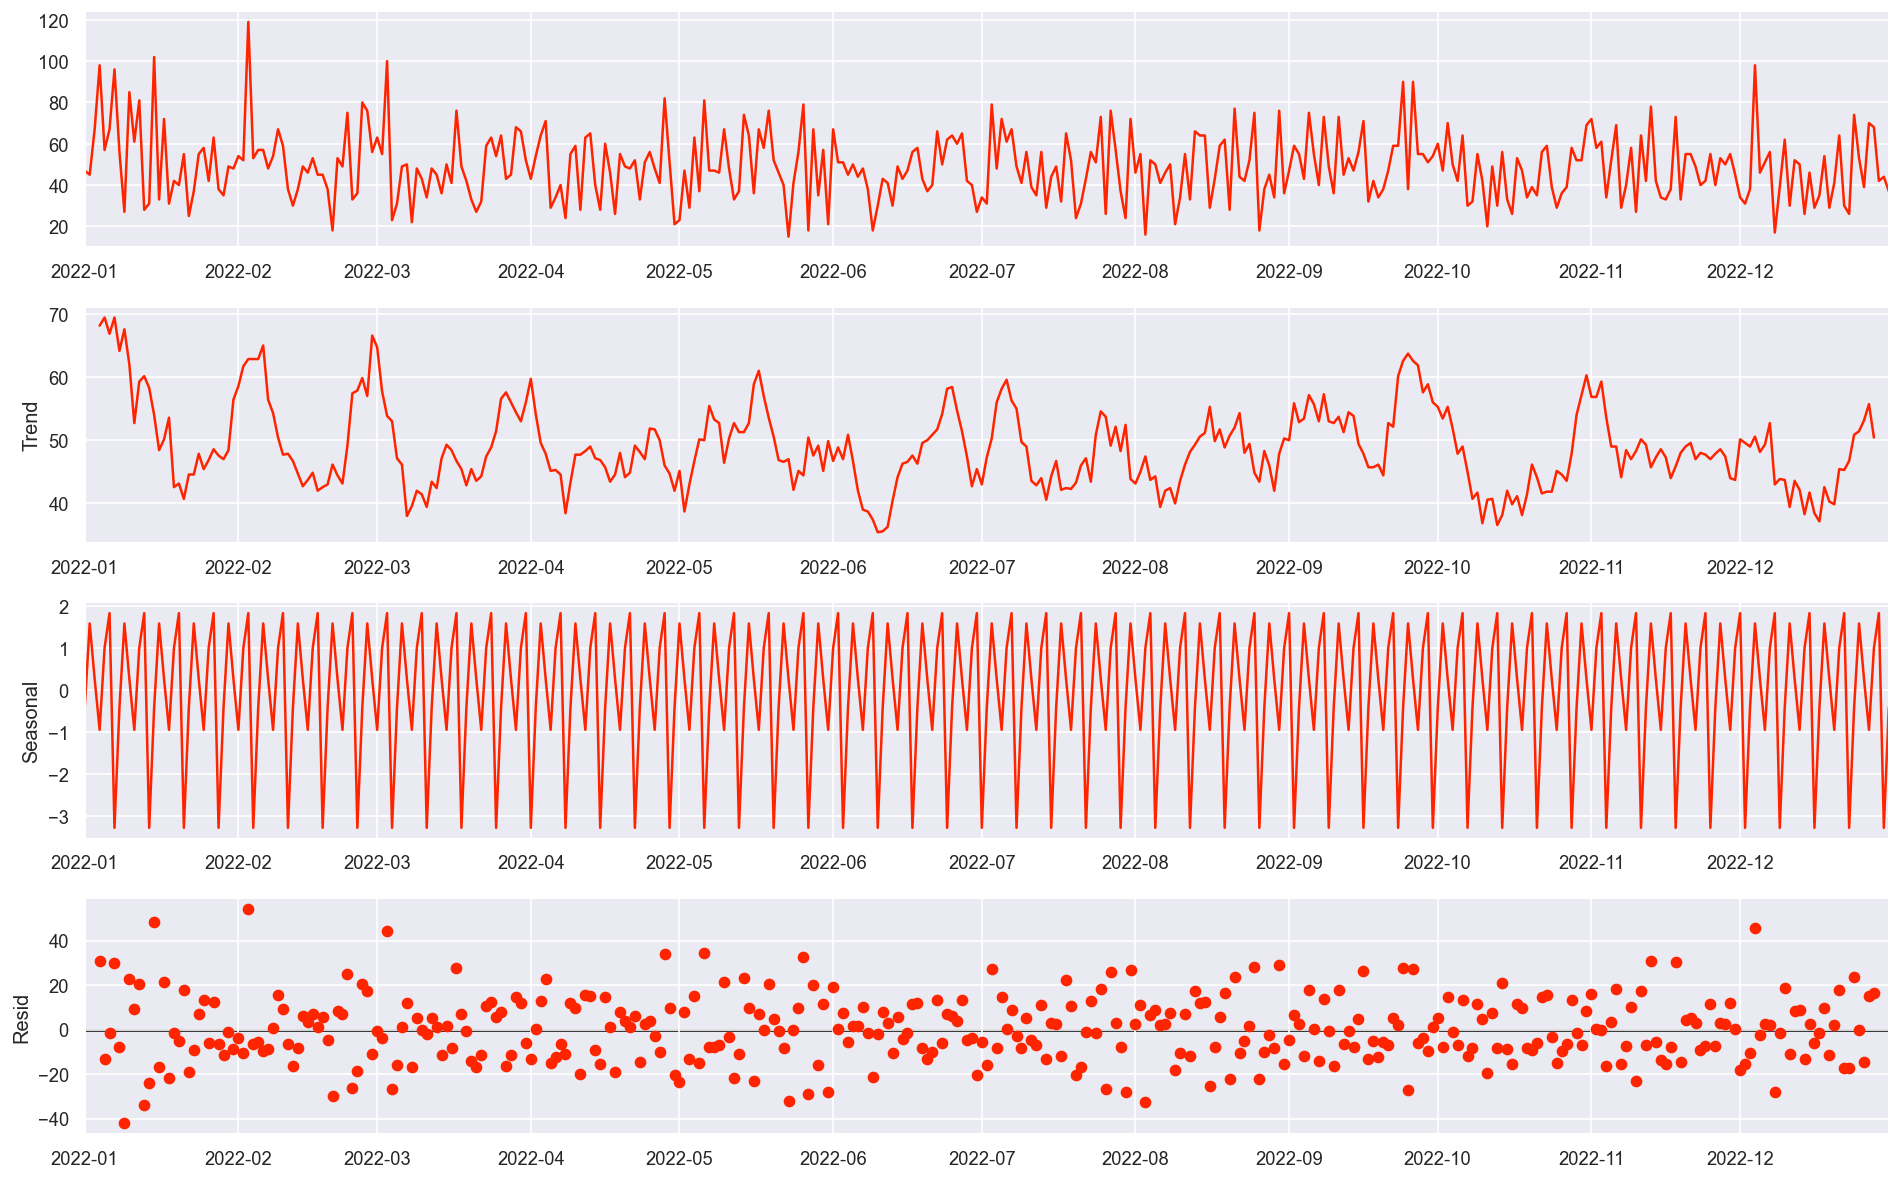

In [52]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 16, 10
decomposition = sm.tsa.seasonal_decompose(df_forecasting, model='additive')
fig = decomposition.plot()
plt.show()

In [53]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_forecasting)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -19.368681
p-value: 0.000000
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571


In [54]:
print("Data train : ",len(train))
print("Data test",len(test))

Data train :  334
Data test 31


In [55]:
train = df_forecasting.loc[:'2022-11-30'] 
test = df_forecasting.loc['2022-12-01':] # Forecast last 30 days

## SMA

In [56]:
result = df_forecasting.copy()
ma_window = 3
result['sma_forecast'] = df_forecasting.rolling(ma_window).mean().shift(1)

## Weighted Moving Average
Weighted Moving Average = (t*weighting factor) + ((t-1)*weighting factor-1) + ((t-n)*weighting factor-n)/n

In [69]:
def wma(weights):
    def calc(x):
        return (weights*x).mean()
    return calc

result['wma_forecast'] =  df_forecasting.rolling(ma_window).apply(wma(np.array([0.5,1,1.5]))).shift(1)

## Exponential Moving Average
Exponential Moving Average = (Close - previouse EMA) * (2/(span+1)) + previous EMA

In [72]:
result['ewm_forecast'] = df_forecasting.ewm(span=3, adjust = False, min_periods=0).mean().shift(1)

## Exponential Smoothing

In [79]:
result['esm_7_forecast'] = df_forecasting.ewm(alpha=0.7, adjust = False, min_periods=3).mean().shift(1)
result['esm_3_forecast'] = df_forecasting.ewm(alpha=0.9, adjust = False, min_periods=3).mean().shift(1)

<AxesSubplot:xlabel='Date'>

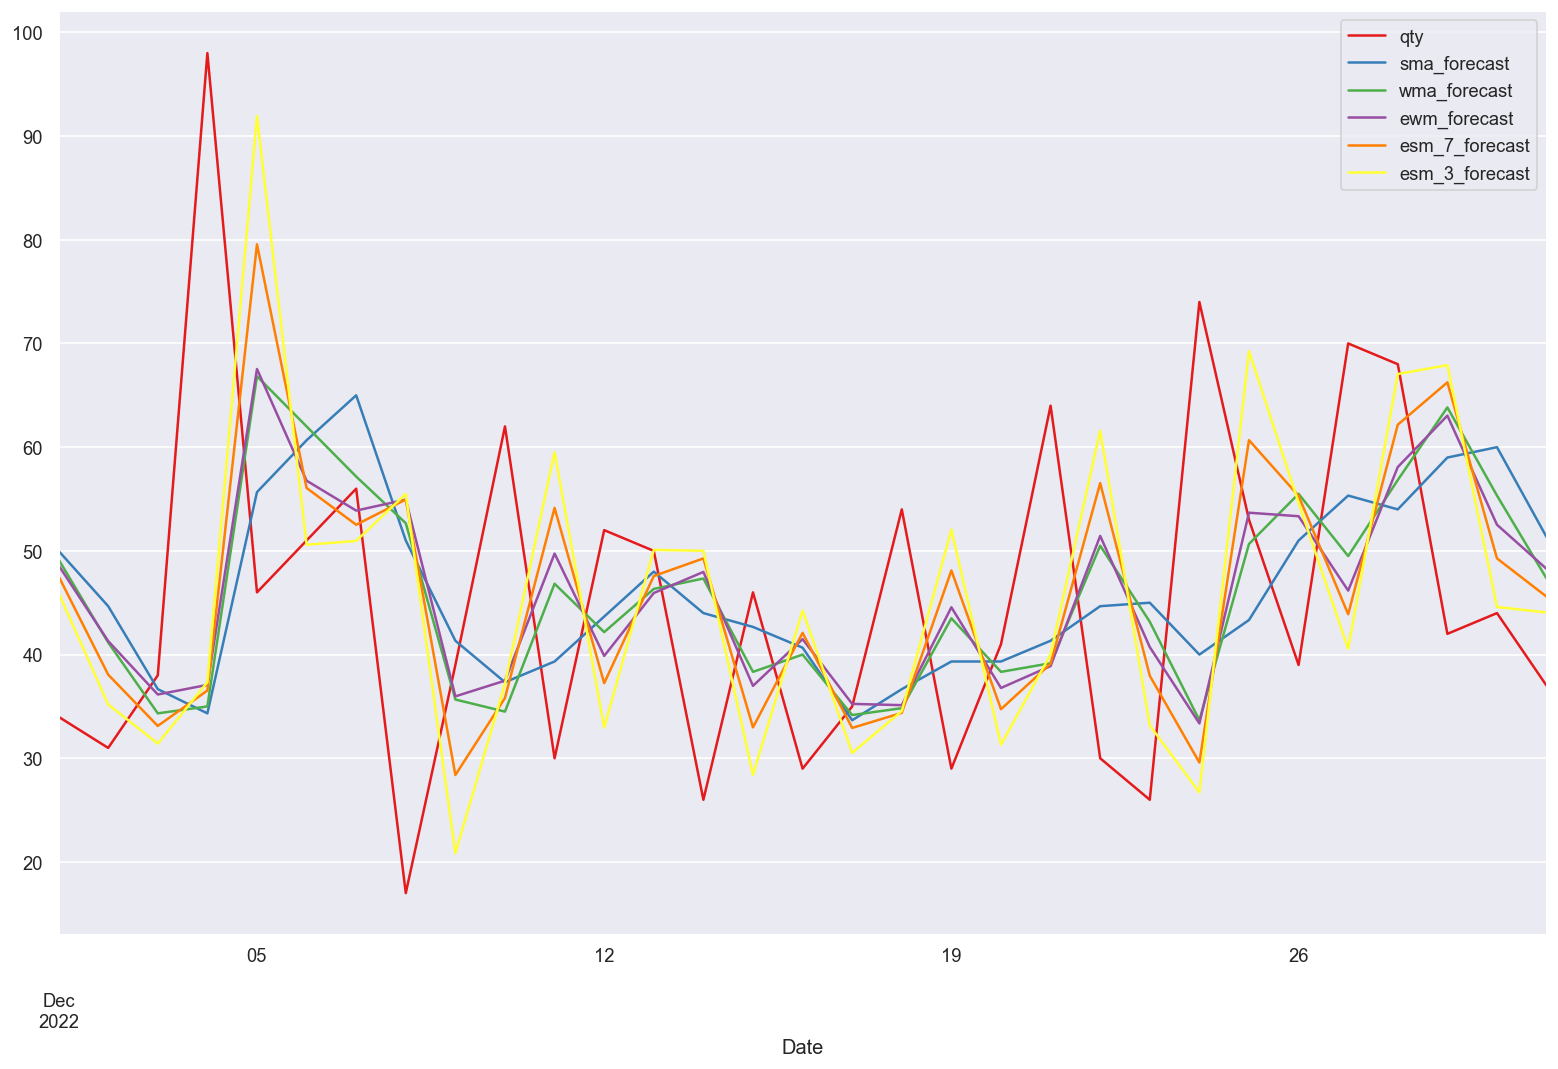

In [80]:
sns.set_theme(palette='Set1')
result.loc['2022-12-01':].plot()

### Evaluation

In [85]:
df_eval = result.loc['2022-12-01':]
df_eval.head(3)

,qty,sma_forecast,wma_forecast,ewm_forecast,esm_7_forecast,esm_3_forecast
Date,,,,,,
2022-12-01,34,50.000000,49.166667,48.604128,47.552921,45.951837
2022-12-02,31,44.666667,41.166667,41.302064,38.065876,35.195184
2022-12-03,38,36.666667,34.333333,36.151032,33.119763,31.419518


In [96]:
from sklearn.metrics import mean_squared_error
rmse_sma = mean_squared_error(df_eval['qty'],df_eval['sma_forecast'])
rmse_wma = mean_squared_error(df_eval['qty'],df_eval['wma_forecast'])
rmse_ewm = mean_squared_error(df_eval['qty'],df_eval['ewm_forecast'])
rmse_esm_7 = mean_squared_error(df_eval['qty'],df_eval['esm_7_forecast'])
rmse_esm_3 = mean_squared_error(df_eval['qty'],df_eval['esm_3_forecast'])
value = [rmse_sma,rmse_wma,rmse_ewm,rmse_esm_7,rmse_esm_3]
eval_result = pd.DataFrame(index=['rmse_sma','rmse_wma','rmse_ewm','rmse_esm_7','rmse_esm_3'],data = value, columns=['RMSE'])
eval_result

,RMSE
rmse_sma,362.071685
rmse_wma,419.950717
rmse_ewm,417.703659
rmse_esm_7,486.771695
rmse_esm_3,573.556721


# SEGMENTATION

In [ ]:
# Feature Selection for 
sns.heatmap(df.corr(), annot=True,fmt='.2f', cmap="BuGn")

In [ ]:
df.head(2)

In [ ]:
df_selection = df.copy()
print("Total Duplicated Customer",df_selection.duplicated(subset='customerid').sum())
# Because we want to create customers segmentation. So that duplicate customer data will be accumulated
df_selection = df_selection.groupby(['customerid']).agg({
                    'transactionid':'count',
                    'qty':'sum',
                    'totalamount':'sum',
                    'income':'mean'
                }).reset_index()
print("Total Duplicated Customer After Grouping",df_selection.duplicated(subset='customerid').sum())
df_selection.head()

In [ ]:
df_selection = df_selection.drop(axis=1, columns='customerid')
df_selection.columns = ['total_transaction','qty_product','total_amount','income']
df_selection.head()

## Standarization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
df_std = df_selection.copy()
scaler = MinMaxScaler()
df_std[df_selection.columns.values] = scaler.fit_transform(df_std)
df_std.head()

## KMEANS CLUSTERING

In [ ]:
from sklearn.cluster import KMeans
inertia=[]
for i in range(1,9):
    kmean = KMeans(random_state=23,n_clusters = i)
    kmean.fit(df_std)
    inertia.append(kmean.inertia_)

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(x=range(1,9,1), y=inertia)
sns.scatterplot(x=range(1,9,1), y=inertia)

Berdasarkan Elbow Method, jumlah cluster terbaik yaitu 3 cluster

In [ ]:
kmean = KMeans(random_state=23,n_clusters = 3)
kmean.fit(df_std)
df_selection['cluster'] = kmean.labels_
df_selection.head()

In [ ]:
summary = df_selection.groupby('cluster').agg({
        'total_transaction' : ['count','sum','mean'],
        'qty_product' :['sum','mean'] ,
        'total_amount':['sum','mean'] ,
        'income':['mean']
    }).reset_index()

In [ ]:
summary.columns = ['cluster', 'total_cus', 'total_transaction','avg_transaction','total_qty','avg_qty',
                   'total_amount','avg_amount','avg_income']
summary

### Cluster Summary

1. Cluster 0: 
- Merupakan kelompok customer terbanyak. Segment Customer ini memiliki rata income terendah.
- Meskipun segment ini berpendapatan paling rendah, segment ini memiliki daya beli yang cukup tinggi.
2. Cluster 1:


3. Cluster 2:    